# 条件による抽出

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# データの準備
df = px.data.gapminder()

In [3]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [9]:
# yearカラムに対して、各行で1952と等しいかどうかの真偽値（True/False）を持つシリーズを返します。
df['year'] == 1952

0        True
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: year, Length: 1704, dtype: bool

In [10]:
# 特定の条件を満たすデータフレームを抽出 今回はyearの値が1952のみ
df[df['year'] == 1952]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
12,Albania,Europe,1952,55.230,1282697,1601.056136,ALB,8
24,Algeria,Africa,1952,43.077,9279525,2449.008185,DZA,12
36,Angola,Africa,1952,30.015,4232095,3520.610273,AGO,24
48,Argentina,Americas,1952,62.485,17876956,5911.315053,ARG,32
...,...,...,...,...,...,...,...,...
1644,Vietnam,Asia,1952,40.412,26246839,605.066492,VNM,704
1656,West Bank and Gaza,Asia,1952,43.160,1030585,1515.592329,PSE,275
1668,"Yemen, Rep.",Asia,1952,32.548,4963829,781.717576,YEM,887
1680,Zambia,Africa,1952,42.038,2672000,1147.388831,ZMB,894


In [18]:
# 複数条件のデータフレームを抽出
gdp_per_cap_med = df['gdpPercap'].median()
condition1 = df['gdpPercap'] > gdp_per_cap_med # gdpが中央値を超えているもの抽出
condition2 = df['year'] >= 2000 # yearが2000年以上のもの

#  gdpが中央値を超えているものかつyearが2000年以上のものを抽出
df[condition1 & condition2]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
22,Albania,Europe,2002,75.651,3508512,4604.211737,ALB,8
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
34,Algeria,Africa,2002,70.994,31287142,5288.040382,DZA,12
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
...,...,...,...,...,...,...,...,...
1630,Uruguay,Americas,2002,75.307,3363085,7727.002004,URY,858
1631,Uruguay,Americas,2007,76.384,3447496,10611.462990,URY,858
1642,Venezuela,Americas,2002,72.766,24287670,8605.047831,VEN,862
1643,Venezuela,Americas,2007,73.747,26084662,11415.805690,VEN,862


In [20]:
# queryメソッドを使用して特定の条件のデータフレーム抽出
df.query('year >= 2000')

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
10,Afghanistan,Asia,2002,42.129,25268405,726.734055,AFG,4
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
22,Albania,Europe,2002,75.651,3508512,4604.211737,ALB,8
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
34,Algeria,Africa,2002,70.994,31287142,5288.040382,DZA,12
...,...,...,...,...,...,...,...,...
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1690,Zambia,Africa,2002,39.193,10595811,1071.613938,ZMB,894
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [22]:
# 複合条件　
df.query('(year >= 2000) & (continent == "Asia")')

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
10,Afghanistan,Asia,2002,42.129,25268405,726.734055,AFG,4
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
94,Bahrain,Asia,2002,74.795,656397,23403.559270,BHR,48
95,Bahrain,Asia,2007,75.635,708573,29796.048340,BHR,48
106,Bangladesh,Asia,2002,62.013,135656790,1136.390430,BGD,50
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1666,West Bank and Gaza,Asia,2002,72.370,3389578,4515.487575,PSE,275
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827,YEM,887


In [24]:
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [27]:
# continentが'Asia', 'Europe', 'Africa'のものを抽出
df.query('continent in ["Asia", "Europe", "Africa"]')

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [30]:
# inの値を変数で渡す
target_continents = ["Asia", "Europe", "Africa"]
df.query('continent in @target_continents') # 変数の先頭に@を付けることで参照する

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [32]:
# "Asia", "Europe", "Africa"いずれか属するもの
target_continents = ["Asia", "Europe", "Africa"]
df['continent'].isin(target_continents)

0       True
1       True
2       True
3       True
4       True
        ... 
1699    True
1700    True
1701    True
1702    True
1703    True
Name: continent, Length: 1704, dtype: bool

In [35]:
# 特定の要素いずれかマッチするものを抽出
df[df['continent'].isin(target_continents)]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [37]:
# Aを含んでいる国名を真偽値で表示
df['country'].str.contains('A')

0        True
1        True
2        True
3        True
4        True
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: country, Length: 1704, dtype: bool

In [39]:
# 国名の特定の文字列パターンを持ったものを抽出
df[df['country'].str.contains('A')]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1411,South Africa,Africa,1987,60.834,35933379,7825.823398,ZAF,710
1412,South Africa,Africa,1992,61.888,39964159,7225.069258,ZAF,710
1413,South Africa,Africa,1997,60.236,42835005,7479.188244,ZAF,710
1414,South Africa,Africa,2002,53.365,44433622,7710.946444,ZAF,710


## NULL値の処理

In [40]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [43]:
df.loc[1704, 'continent'] = 'Asia'

In [44]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1705 non-null   object 
 2   year       1704 non-null   float64
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   float64
dtypes: float64(5), object(3)
memory usage: 106.7+ KB


In [47]:
df.fillna(0) # 全てのNanを0で埋める

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0


In [48]:
df.fillna(1) # 全てのNanを1で埋める

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0


In [51]:
# 指定したカラムの値に辞書型で代入 指定しなかったものはNanになる
df.fillna({'country': 'No country', 'year': '1952'})

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0


In [53]:
# Nan値を含んだレコードdropする
df.dropna()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987.0,62.351,9216418.0,706.157306,ZWE,716.0
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0


In [55]:
df.dropna(how='all') # allを渡すと全ての値がNanだけのレコード削除

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0


In [57]:
# 特定の値がNanのレコード削除
df.dropna(subset=['year'])

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987.0,62.351,9216418.0,706.157306,ZWE,716.0
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0


In [58]:
df.dropna(subset=['continent'])

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0


### 重複データ処理

In [60]:
# 1703行目の内容を1704にコピー
df.loc[1704, :] = df.loc[1703, :]
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0


In [62]:
# 重複したものを削除
df.drop_duplicates()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987.0,62.351,9216418.0,706.157306,ZWE,716.0
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0


In [64]:
# subsetで特定のカラムの重複削除
df.drop_duplicates(subset=['country'])

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
12,Albania,Europe,1952.0,55.230,1282697.0,1601.056136,ALB,8.0
24,Algeria,Africa,1952.0,43.077,9279525.0,2449.008185,DZA,12.0
36,Angola,Africa,1952.0,30.015,4232095.0,3520.610273,AGO,24.0
48,Argentina,Americas,1952.0,62.485,17876956.0,5911.315053,ARG,32.0
...,...,...,...,...,...,...,...,...
1644,Vietnam,Asia,1952.0,40.412,26246839.0,605.066492,VNM,704.0
1656,West Bank and Gaza,Asia,1952.0,43.160,1030585.0,1515.592329,PSE,275.0
1668,"Yemen, Rep.",Asia,1952.0,32.548,4963829.0,781.717576,YEM,887.0
1680,Zambia,Africa,1952.0,42.038,2672000.0,1147.388831,ZMB,894.0


### インデックスカラムの操作

In [65]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0


In [66]:
# indesxをリセットする
df.reset_index()

,index,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...,...
1700,1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0
1703,1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0


In [68]:
# 特定のカラムをインデックスにする
df.set_index('country')

,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
country,,,,,,,
Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...
Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0


In [69]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0


In [72]:
# カラム名を変更
df.rename(columns={'year':'YEAR'})

,country,continent,YEAR,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0


### ビニング

In [73]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0


In [75]:
# yearを三分割する
pd.cut(df['year'], 3)

0       (1951.945, 1970.333]
1       (1951.945, 1970.333]
2       (1951.945, 1970.333]
3       (1951.945, 1970.333]
4       (1970.333, 1988.667]
                ...         
1700      (1988.667, 2007.0]
1701      (1988.667, 2007.0]
1702      (1988.667, 2007.0]
1703      (1988.667, 2007.0]
1704      (1988.667, 2007.0]
Name: year, Length: 1705, dtype: category
Categories (3, interval[float64, right]): [(1951.945, 1970.333] < (1970.333, 1988.667] < (1988.667, 2007.0]]

In [76]:
pd.cut(df['year'], 3, labels=[1, 2, 3])

0       1
1       1
2       1
3       1
4       2
       ..
1700    3
1701    3
1702    3
1703    3
1704    3
Name: year, Length: 1705, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [78]:
# 1950～1970, 1970～1990, 1990～2010に分類する
pd.cut(df['year'], bins=[1950, 1970, 1990, 2010])

0       (1950, 1970]
1       (1950, 1970]
2       (1950, 1970]
3       (1950, 1970]
4       (1970, 1990]
            ...     
1700    (1990, 2010]
1701    (1990, 2010]
1702    (1990, 2010]
1703    (1990, 2010]
1704    (1990, 2010]
Name: year, Length: 1705, dtype: category
Categories (3, interval[int64, right]): [(1950, 1970] < (1970, 1990] < (1990, 2010]]

### 関数の適応

In [79]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0
...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0


In [80]:
df['pop'].describe()

count    1.705000e+03
mean     2.959107e+07
std      1.061276e+08
min      6.001100e+04
25%      2.794552e+06
50%      7.026113e+06
75%      1.957678e+07
max      1.318683e+09
Name: pop, dtype: float64

In [82]:
pop_med = 7.026113e+06
df['pop_category'] = df['pop'].apply(lambda x: 'gt_md' if x >= pop_med else 'lt_med')

In [83]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,pop_category
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0,gt_md
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0,gt_md
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0,gt_md
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0,gt_md
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0,gt_md
...,...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0,gt_md
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0,gt_md
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0,gt_md
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0,gt_md


In [85]:
df['Log10_pop'] = df['pop'].apply(lambda x: np.log10(x))

In [86]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,pop_category,Log10_pop
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0,gt_md,6.925587
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0,gt_md,6.965716
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0,gt_md,7.011447
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0,gt_md,7.062129
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0,gt_md,7.116590
...,...,...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0,gt_md,7.029560
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0,gt_md,7.057093
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0,gt_md,7.076515
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0,gt_md,7.090298


In [87]:
def my_func(x):
    return np.log10(x)

In [88]:
df['pop'].apply(my_func)

0       6.925587
1       6.965716
2       7.011447
3       7.062129
4       7.116590
          ...   
1700    7.029560
1701    7.057093
1702    7.076515
1703    7.090298
1704    7.090298
Name: pop, Length: 1705, dtype: float64

In [92]:
def add_continent_code(x):
    if x == 'Asia':
        return 1
    elif x == 'Europe':
        return 2
    else:
        return 3

In [95]:
# applyを使用することで複雑な演算行うことができる
df['continent'].apply(add_continent_code)

0       1
1       1
2       1
3       1
4       1
       ..
1700    3
1701    3
1702    3
1703    3
1704    3
Name: continent, Length: 1705, dtype: int64

In [94]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,pop_category,Log10_pop
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0,gt_md,6.925587
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0,gt_md,6.965716
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0,gt_md,7.011447
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0,gt_md,7.062129
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0,gt_md,7.116590
...,...,...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0,gt_md,7.029560
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0,gt_md,7.057093
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0,gt_md,7.076515
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0,gt_md,7.090298


### Groupby

In [96]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,pop_category,Log10_pop
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0,gt_md,6.925587
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0,gt_md,6.965716
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0,gt_md,7.011447
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0,gt_md,7.062129
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0,gt_md,7.116590
...,...,...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0,gt_md,7.029560
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0,gt_md,7.057093
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0,gt_md,7.076515
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0,gt_md,7.090298


In [98]:
# continentごとにグループを分けて平均値を算出
df.groupby('continent')['pop'].mean()

continent
Africa      9.919835e+06
Americas    2.450479e+07
Asia        7.703872e+07
Europe      1.716976e+07
Oceania     8.874672e+06
Name: pop, dtype: float64

In [99]:
continent_group = df.groupby('continent')

In [102]:
continent_group.get_group('Asia')

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,pop_category,Log10_pop
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0,gt_md,6.925587
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0,gt_md,6.965716
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0,gt_md,7.011447
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0,gt_md,7.062129
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0,gt_md,7.116590
...,...,...,...,...,...,...,...,...,...,...
1675,"Yemen, Rep.",Asia,1987.0,52.922,11219340.0,1971.741538,YEM,887.0,gt_md,7.049967
1676,"Yemen, Rep.",Asia,1992.0,55.599,13367997.0,1879.496673,YEM,887.0,gt_md,7.126066
1677,"Yemen, Rep.",Asia,1997.0,58.020,15826497.0,2117.484526,YEM,887.0,gt_md,7.199385
1678,"Yemen, Rep.",Asia,2002.0,60.308,18701257.0,2234.820827,YEM,887.0,gt_md,7.271871


In [103]:
continent_group['pop'].mean()

continent
Africa      9.919835e+06
Americas    2.450479e+07
Asia        7.703872e+07
Europe      1.716976e+07
Oceania     8.874672e+06
Name: pop, dtype: float64

In [106]:
# データフレームにする　よく使用する
df.groupby('continent')['pop'].median().reset_index()

,continent,pop
0,Africa,4580410.0
1,Americas,6227510.0
2,Asia,14530830.5
3,Europe,8551125.0
4,Oceania,6403491.5


In [109]:
import warnings # リストを使用して複数のカラムに集約すると警告分でないようにする
warnings.simplefilter(action='ignore', category=FutureWarning)

# 複数のカラムに集約する
df.groupby('continent')['pop', 'gdpPercap'].median().reset_index()

,continent,pop,gdpPercap
0,Africa,4580410.0,1191.207681
1,Americas,6227510.0,5465.509853
2,Asia,14530830.5,2646.786844
3,Europe,8551125.0,12081.749115
4,Oceania,6403491.5,17983.303955


In [111]:
# aggと辞書でそれぞれ別の集計する
df.groupby('continent')['pop', 'gdpPercap'].agg({'pop': 'median', 'gdpPercap': 'mean'})

,pop,gdpPercap
continent,,
Africa,4580410.0,2190.996106
Americas,6227510.0,7136.110356
Asia,14530830.5,7902.150428
Europe,8551125.0,14469.475533
Oceania,6403491.5,18621.609223


In [114]:
df.groupby(['continent', 'year'])['pop'].mean().reset_index()

,continent,year,pop
0,Africa,1952.0,4.570010e+06
1,Africa,1957.0,5.093033e+06
2,Africa,1962.0,5.702247e+06
3,Africa,1967.0,6.447875e+06
4,Africa,1972.0,7.305376e+06
5,Africa,1977.0,8.328097e+06
6,Africa,1982.0,9.602857e+06
7,Africa,1987.0,1.105450e+07
8,Africa,1992.0,1.267464e+07
9,Africa,1997.0,1.430448e+07


### pivot_table

In [115]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,pop_category,Log10_pop
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314,AFG,4.0,gt_md,6.925587
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030,AFG,4.0,gt_md,6.965716
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710,AFG,4.0,gt_md,7.011447
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138,AFG,4.0,gt_md,7.062129
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106,AFG,4.0,gt_md,7.116590
...,...,...,...,...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1992.0,60.377,10704340.0,693.420786,ZWE,716.0,gt_md,7.029560
1701,Zimbabwe,Africa,1997.0,46.809,11404948.0,792.449960,ZWE,716.0,gt_md,7.057093
1702,Zimbabwe,Africa,2002.0,39.989,11926563.0,672.038623,ZWE,716.0,gt_md,7.076515
1703,Zimbabwe,Africa,2007.0,43.487,12311143.0,469.709298,ZWE,716.0,gt_md,7.090298


In [7]:
pd.pivot_table(df, index=['year'], columns=['continent'], values=['pop'], aggfunc='mean')

pop                                                     
continent        Africa     Americas          Asia        Europe     Oceania
year                                                                        
1952       4.570010e+06  13806097.84  4.228356e+07  1.393736e+07   5343003.0
1957       5.093033e+06  15478156.64  4.735699e+07  1.459635e+07   5970988.0
1962       5.702247e+06  17330810.16  5.140476e+07  1.534517e+07   6641759.0
1967       6.447875e+06  19229864.92  5.774736e+07  1.603930e+07   7300207.0
1972       7.305376e+06  21175368.40  6.518098e+07  1.668784e+07   8053050.0
1977       8.328097e+06  23122707.96  7.225799e+07  1.723882e+07   8619500.0
1982       9.602857e+06  25211636.80  7.909502e+07  1.770890e+07   9197425.0
1987       1.105450e+07  27310158.84  8.700669e+07  1.810314e+07   9787207.5
1992       1.267464e+07  29570964.16  9.494825e+07  1.860476e+07  10459825.5
1997       1.430448e+07  31876016.40  1.025238e+08  1.896480e+07  11120715.0
2002       1.603315e+07  33990910.48  1.091455e+08  1.927413e+07  11727414.5
2007       1.787576e+07  35954847.36  1.155138e+08  1.953662e+07  12274973.5

In [8]:
pd.pivot_table(df, index=['year'], columns=['continent'], values=['pop', 'gdpPercap'], aggfunc='mean')

gdpPercap                                            \
continent       Africa      Americas          Asia        Europe   
year                                                               
1952       1252.572466   4079.062552   5195.484004   5661.057435   
1957       1385.236062   4616.043733   5787.732940   6963.012816   
1962       1598.078825   4901.541870   5729.369625   8365.486814   
1967       2050.363801   5668.253496   5971.173374  10143.823757   
1972       2339.615674   6491.334139   8187.468699  12479.575246   
1977       2585.938508   7352.007126   7791.314020  14283.979110   
1982       2481.592960   7506.737088   7434.135157  15617.896551   
1987       2282.668991   7793.400261   7608.226508  17214.310727   
1992       2281.810333   8044.934406   8639.690248  17061.568084   
1997       2378.759555   8889.300863   9834.093295  19076.781802   
2002       2599.385159   9287.677107  10174.090397  21711.732422   
2007       3089.032605  11003.031625  12473.026870  25054.481636   

                                  pop                             \
continent       Oceania        Africa     Americas          Asia   
year                                                               
1952       10298.085650  4.570010e+06  13806097.84  4.228356e+07   
1957       11598.522455  5.093033e+06  15478156.64  4.735699e+07   
1962       12696.452430  5.702247e+06  17330810.16  5.140476e+07   
1967       14495.021790  6.447875e+06  19229864.92  5.774736e+07   
1972       16417.333380  7.305376e+06  21175368.40  6.518098e+07   
1977       17283.957605  8.328097e+06  23122707.96  7.225799e+07   
1982       18554.709840  9.602857e+06  25211636.80  7.909502e+07   
1987       20448.040160  1.105450e+07  27310158.84  8.700669e+07   
1992       20894.045885  1.267464e+07  29570964.16  9.494825e+07   
1997       24024.175170  1.430448e+07  31876016.40  1.025238e+08   
2002       26938.778040  1.603315e+07  33990910.48  1.091455e+08   
2007       29810.188275  1.787576e+07  35954847.36  1.155138e+08   

                                     
continent        Europe     Oceania  
year                                 
1952       1.393736e+07   5343003.0  
1957       1.459635e+07   5970988.0  
1962       1.534517e+07   6641759.0  
1967       1.603930e+07   7300207.0  
1972       1.668784e+07   8053050.0  
1977       1.723882e+07   8619500.0  
1982       1.770890e+07   9197425.0  
1987       1.810314e+07   9787207.5  
1992       1.860476e+07  10459825.5  
1997       1.896480e+07  11120715.0  
2002       1.927413e+07  11727414.5  
2007       1.953662e+07  12274973.5

In [9]:
# ピボットテーブルの作成
pop_pivot = pd.pivot_table(df, index=['year'], columns=['continent'], values=['pop'], aggfunc='mean')

In [10]:
pop_pivot

pop                                                     
continent        Africa     Americas          Asia        Europe     Oceania
year                                                                        
1952       4.570010e+06  13806097.84  4.228356e+07  1.393736e+07   5343003.0
1957       5.093033e+06  15478156.64  4.735699e+07  1.459635e+07   5970988.0
1962       5.702247e+06  17330810.16  5.140476e+07  1.534517e+07   6641759.0
1967       6.447875e+06  19229864.92  5.774736e+07  1.603930e+07   7300207.0
1972       7.305376e+06  21175368.40  6.518098e+07  1.668784e+07   8053050.0
1977       8.328097e+06  23122707.96  7.225799e+07  1.723882e+07   8619500.0
1982       9.602857e+06  25211636.80  7.909502e+07  1.770890e+07   9197425.0
1987       1.105450e+07  27310158.84  8.700669e+07  1.810314e+07   9787207.5
1992       1.267464e+07  29570964.16  9.494825e+07  1.860476e+07  10459825.5
1997       1.430448e+07  31876016.40  1.025238e+08  1.896480e+07  11120715.0
2002       1.603315e+07  33990910.48  1.091455e+08  1.927413e+07  11727414.5
2007       1.787576e+07  35954847.36  1.155138e+08  1.953662e+07  12274973.5

In [12]:
pop_pivot.divide(pop_pivot.sum(axis=1), axis=0)

pop                                        
continent    Africa  Americas      Asia    Europe   Oceania
year                                                       
1952       0.057168  0.172706  0.528941  0.174348  0.066838
1957       0.057551  0.174903  0.535134  0.164939  0.067472
1962       0.059137  0.179734  0.533108  0.159141  0.068880
1967       0.060393  0.180115  0.540885  0.150230  0.068377
1972       0.061699  0.178842  0.550503  0.140941  0.068014
1977       0.064276  0.178461  0.557688  0.133049  0.066525
1982       0.068194  0.179040  0.561691  0.125759  0.065315
1987       0.072128  0.178193  0.567700  0.118119  0.063859
1992       0.076235  0.177861  0.571088  0.111903  0.062913
1997       0.080007  0.178288  0.573432  0.106073  0.062200
2002       0.084309  0.178739  0.573933  0.101351  0.061668
2007       0.088865  0.178741  0.574250  0.097122  0.061022

上記のコードは、ピボットテーブルの各行の合計値で各値を割って、正規化している。つまり、各行の値の合計が1になるようにしている。これは、各大陸の人口がその年の全体の人口に対してどの程度の割合を占めているかを確認するためのもの。

このコード全体を通して、各年の各大陸の人口の平均を計算し、それを正規化して各大陸の人口の割合を求めている

### グラフにすると以下

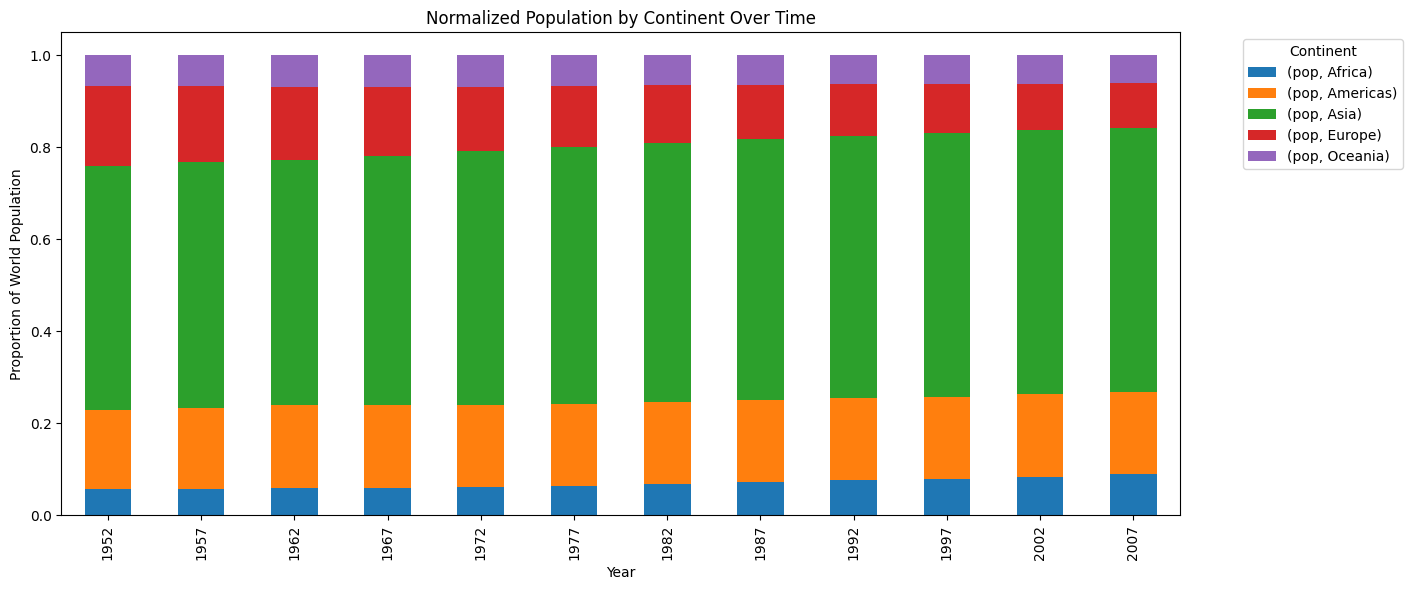

In [15]:

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# データの準備
df = px.data.gapminder()
pop_pivot = pd.pivot_table(df, index=['year'], columns=['continent'], values=['pop'], aggfunc='mean')
normalized_pop_pivot = pop_pivot.divide(pop_pivot.sum(axis=1), axis=0)

# 積み上げ棒グラフの作成
normalized_pop_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Normalized Population by Continent Over Time')
plt.ylabel('Proportion of World Population')
plt.xlabel('Year')
plt.tight_layout()
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


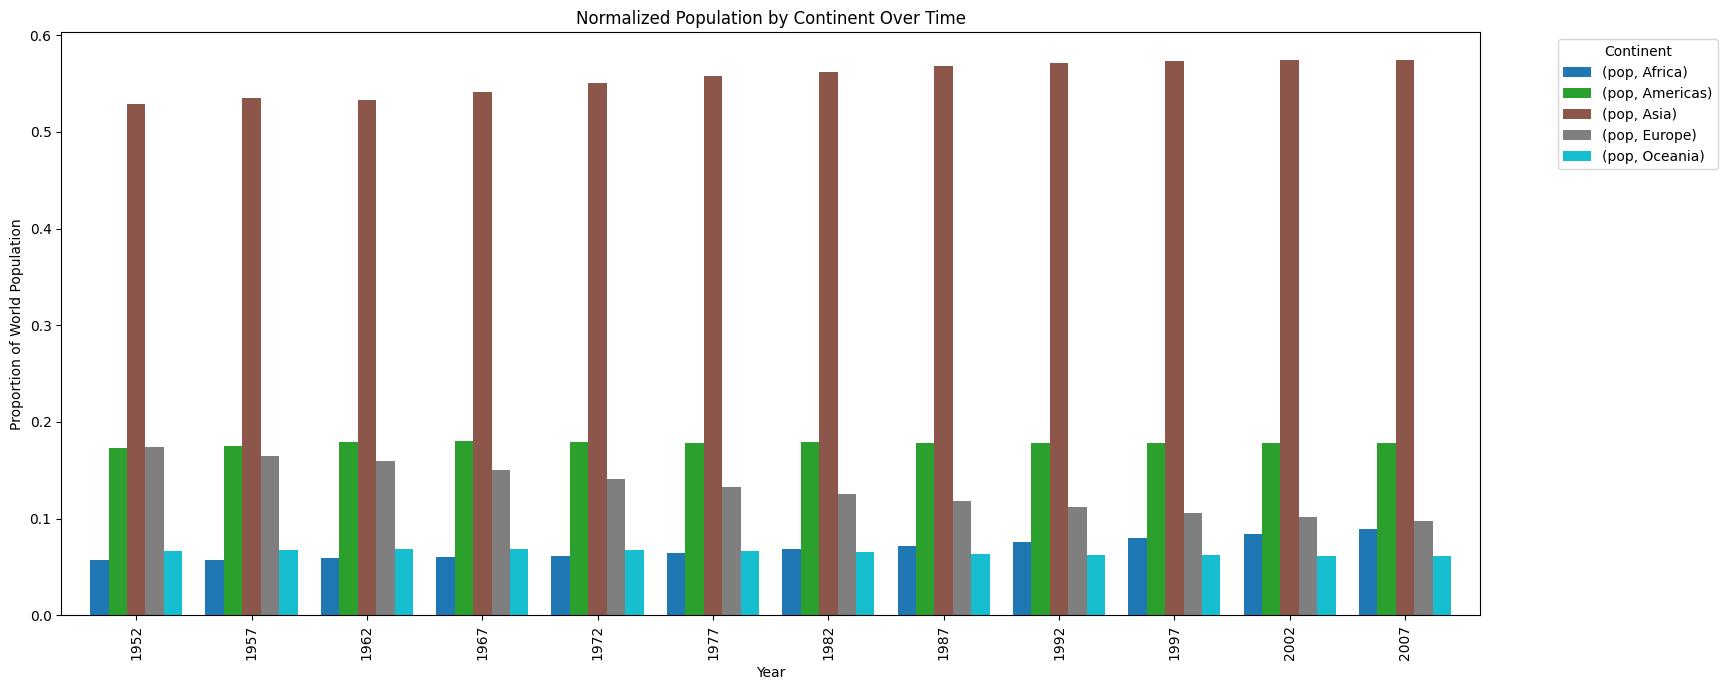

In [14]:
# 棒グラフの作成
normalized_pop_pivot.plot(kind='bar', figsize=(15, 7), width=0.8, colormap='tab10')

plt.title('Normalized Population by Continent Over Time')
plt.ylabel('Proportion of World Population')
plt.xlabel('Year')
plt.tight_layout()
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### melt
横持のテーブルを縦持にする

In [16]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [17]:
pd.pivot_table(df, index=['year'], columns=['continent'], values=['pop'], aggfunc='mean')

pop                                                     
continent        Africa     Americas          Asia        Europe     Oceania
year                                                                        
1952       4.570010e+06  13806097.84  4.228356e+07  1.393736e+07   5343003.0
1957       5.093033e+06  15478156.64  4.735699e+07  1.459635e+07   5970988.0
1962       5.702247e+06  17330810.16  5.140476e+07  1.534517e+07   6641759.0
1967       6.447875e+06  19229864.92  5.774736e+07  1.603930e+07   7300207.0
1972       7.305376e+06  21175368.40  6.518098e+07  1.668784e+07   8053050.0
1977       8.328097e+06  23122707.96  7.225799e+07  1.723882e+07   8619500.0
1982       9.602857e+06  25211636.80  7.909502e+07  1.770890e+07   9197425.0
1987       1.105450e+07  27310158.84  8.700669e+07  1.810314e+07   9787207.5
1992       1.267464e+07  29570964.16  9.494825e+07  1.860476e+07  10459825.5
1997       1.430448e+07  31876016.40  1.025238e+08  1.896480e+07  11120715.0
2002       1.603315e+07  33990910.48  1.091455e+08  1.927413e+07  11727414.5
2007       1.787576e+07  35954847.36  1.155138e+08  1.953662e+07  12274973.5

In [20]:
# クロス集計表を溶かして縦方向に並び替える
pop_pivot =  pd.pivot_table(df, index=['year'], columns=['continent'], values=['pop'], aggfunc='mean')
pd.melt(pop_pivot.reset_index(), id_vars=['year'])

,year,None,continent,value
0,1952,pop,Africa,4.570010e+06
1,1957,pop,Africa,5.093033e+06
2,1962,pop,Africa,5.702247e+06
3,1967,pop,Africa,6.447875e+06
4,1972,pop,Africa,7.305376e+06
5,1977,pop,Africa,8.328097e+06
6,1982,pop,Africa,9.602857e+06
7,1987,pop,Africa,1.105450e+07
8,1992,pop,Africa,1.267464e+07
9,1997,pop,Africa,1.430448e+07


In [24]:
# valueの名前をpopにする
pd.melt(pop_pivot.reset_index(), id_vars=['year'], value_name='pop')

,year,None,continent,pop
0,1952,pop,Africa,4.570010e+06
1,1957,pop,Africa,5.093033e+06
2,1962,pop,Africa,5.702247e+06
3,1967,pop,Africa,6.447875e+06
4,1972,pop,Africa,7.305376e+06
5,1977,pop,Africa,8.328097e+06
6,1982,pop,Africa,9.602857e+06
7,1987,pop,Africa,1.105450e+07
8,1992,pop,Africa,1.267464e+07
9,1997,pop,Africa,1.430448e+07


### ファイル読込

In [31]:
# ファイルの読み込み
file_path = '../dataset/countries_codes_and_coordinates.csv'
df = pd.read_csv(file_path, sep=',')

In [28]:
df.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""


In [35]:
# usecolsを使って特定のカラムを読み込む
df_ = pd.read_csv(file_path, sep=',', usecols=[0, 1])

In [34]:
df_.head()

,Country,Alpha-2 code
0,Afghanistan,"""AF"""
1,Albania,"""AL"""
2,Algeria,"""DZ"""
3,American Samoa,"""AS"""
4,Andorra,"""AD"""


In [41]:
# xlsxを読み込む場合
df_excel = pd.read_excel('../dataset/sales_transactions.xlsx')
df_excel

,Unnamed: 0,ymd,transaction_id,SKU,transaction_type,payment,details,revenue,quantity,product_name
0,0,2020-01-07,250-0042069-0262213,60,0,1,4,-314,NaN,21
1,1,2020-01-07,250-0042069-0262213,60,0,1,8,-499,NaN,21
2,2,2020-01-07,250-0042069-0262213,60,0,1,10,-693,NaN,21
3,3,2020-01-07,250-0042069-0262213,60,0,4,0,5727,1.0,21
4,4,2020-01-07,250-0042069-0262213,60,0,2,2,29,NaN,21
...,...,...,...,...,...,...,...,...,...,...
592,609,2019-11-20,503-0100465-6209437,2,0,3,14,-373,NaN,60
593,610,2019-11-20,503-0100465-6209437,2,0,4,0,682,1.0,60
594,611,2019-11-20,503-0100465-6209437,2,0,2,9,68,NaN,60
595,612,2019-11-20,503-0100465-6209437,2,0,2,12,37,NaN,60


In [43]:
# データ準備
df = px.data.gapminder()

In [66]:
file_path = '../dataset/countries_codes_and_coordinates.csv'
country_master_df = pd.read_csv(file_path, sep=',', usecols=[2, 4, 5])

In [54]:
country_master_df.head()

,Alpha-3 code,Latitude (average),Longitude (average)
0,"""AFG""","""33""","""65"""
1,"""ALB""","""41""","""20"""
2,"""DZA""","""28""","""3"""
3,"""ASM""","""-14.3333""","""-170"""
4,"""AND""","""42.5""","""1.6"""


In [55]:
country_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Alpha-3 code         256 non-null    object
 1   Latitude (average)   256 non-null    object
 2   Longitude (average)  256 non-null    object
dtypes: object(3)
memory usage: 6.1+ KB


In [56]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [67]:
# 各セルの値がダブルクウォートで囲まれていると仮定して、最初と最後の文字を取り除く
for col in country_master_df.columns:
    country_master_df[col] = country_master_df[col].apply(lambda x: x.strip()[1:-1])

In [68]:
country_master_df

,Alpha-3 code,Latitude (average),Longitude (average)
0,AFG,33,65
1,ALB,41,20
2,DZA,28,3
3,ASM,-14.3333,-170
4,AND,42.5,1.6
...,...,...,...
251,WLF,-13.3,-176.2
252,ESH,24.5,-13
253,YEM,15,48
254,ZMB,-15,30


In [72]:
"""
2つのデータフレームを特定のカラムを基に内部結合
結合前に、country_master_dfから重複する行を削除
結果として得られるデータフレームには、dfのiso_alphaカラムとcountry_master_dfのAlpha-3 codeカラムが一致する行のみが含まれる
"""

pd.merge(df, country_master_df.drop_duplicates(), 
        left_on='iso_alpha', right_on='Alpha-3 code', how='inner')

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,Alpha-3 code,Latitude (average),Longitude (average)
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4,AFG,33,65
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4,AFG,33,65
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4,AFG,33,65
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4,AFG,33,65
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4,AFG,33,65
...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716,ZWE,-20,30
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716,ZWE,-20,30
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716,ZWE,-20,30
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716,ZWE,-20,30


### concat

In [77]:
# データ準備
df1 = df.iloc[:100, :]
df2 = df.iloc[100:200, :]

In [75]:
df1.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [76]:
df2.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
100,Bangladesh,Asia,1972,45.252,70759295,630.233627,BGD,50
101,Bangladesh,Asia,1977,46.923,80428306,659.877232,BGD,50
102,Bangladesh,Asia,1982,50.009,93074406,676.981866,BGD,50
103,Bangladesh,Asia,1987,52.819,103764241,751.979403,BGD,50
104,Bangladesh,Asia,1992,56.018,113704579,837.810164,BGD,50


In [80]:
# 同じ構造を持ったデータフレームを縦方向に結合
concat_df = pd.concat([df1, df2])

In [81]:
concat_df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
195,Burkina Faso,Africa,1967,40.697,5127935,794.826560,BFA,854
196,Burkina Faso,Africa,1972,43.591,5433886,854.735976,BFA,854
197,Burkina Faso,Africa,1977,46.137,5889574,743.387037,BFA,854
198,Burkina Faso,Africa,1982,48.122,6634596,807.198586,BFA,854


### 時系列データ


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
excel_file_path = '../dataset/sales_transactions.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)
df

,ymd,transaction_id,SKU,transaction_type,payment,details,revenue,quantity,product_name
0,2020-01-07,250-0042069-0262213,60,0,1,4,-314,NaN,21
1,2020-01-07,250-0042069-0262213,60,0,1,8,-499,NaN,21
2,2020-01-07,250-0042069-0262213,60,0,1,10,-693,NaN,21
3,2020-01-07,250-0042069-0262213,60,0,4,0,5727,1.0,21
4,2020-01-07,250-0042069-0262213,60,0,2,2,29,NaN,21
...,...,...,...,...,...,...,...,...,...
609,2019-11-20,503-0100465-6209437,2,0,3,14,-373,NaN,60
610,2019-11-20,503-0100465-6209437,2,0,4,0,682,1.0,60
611,2019-11-20,503-0100465-6209437,2,0,2,9,68,NaN,60
612,2019-11-20,503-0100465-6209437,2,0,2,12,37,NaN,60


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 613
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ymd               597 non-null    datetime64[ns]
 1   transaction_id    597 non-null    object        
 2   SKU               597 non-null    int64         
 3   transaction_type  597 non-null    int64         
 4   payment           597 non-null    int64         
 5   details           597 non-null    int64         
 6   revenue           597 non-null    int64         
 7   quantity          144 non-null    float64       
 8   product_name      597 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 46.6+ KB


In [100]:
# ymdをobjct型にする
df['ymd'] = df['ymd'].astype(str)

In [101]:
df.dtypes

ymd                  object
transaction_id       object
SKU                   int64
transaction_type      int64
payment               int64
details               int64
revenue               int64
quantity            float64
product_name          int64
dtype: object

In [102]:
df['ymd'] = pd.to_datetime(df['ymd'])

In [103]:
df.dtypes

ymd                 datetime64[ns]
transaction_id              object
SKU                          int64
transaction_type             int64
payment                      int64
details                      int64
revenue                      int64
quantity                   float64
product_name                 int64
dtype: object

In [105]:
df['ymd'].dt.year

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
609    2019
610    2019
611    2019
612    2019
613    2019
Name: ymd, Length: 597, dtype: int64

In [106]:
df

,ymd,transaction_id,SKU,transaction_type,payment,details,revenue,quantity,product_name
0,2020-01-07,250-0042069-0262213,60,0,1,4,-314,NaN,21
1,2020-01-07,250-0042069-0262213,60,0,1,8,-499,NaN,21
2,2020-01-07,250-0042069-0262213,60,0,1,10,-693,NaN,21
3,2020-01-07,250-0042069-0262213,60,0,4,0,5727,1.0,21
4,2020-01-07,250-0042069-0262213,60,0,2,2,29,NaN,21
...,...,...,...,...,...,...,...,...,...
609,2019-11-20,503-0100465-6209437,2,0,3,14,-373,NaN,60
610,2019-11-20,503-0100465-6209437,2,0,4,0,682,1.0,60
611,2019-11-20,503-0100465-6209437,2,0,2,9,68,NaN,60
612,2019-11-20,503-0100465-6209437,2,0,2,12,37,NaN,60


In [108]:
# ymdから月を取得
df['ymd'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
609    11
610    11
611    11
612    11
613    11
Name: ymd, Length: 597, dtype: int64

In [109]:
df['ymd'].dt.day

0       7
1       7
2       7
3       7
4       7
       ..
609    20
610    20
611    20
612    20
613    20
Name: ymd, Length: 597, dtype: int64

In [110]:
df

,ymd,transaction_id,SKU,transaction_type,payment,details,revenue,quantity,product_name
0,2020-01-07,250-0042069-0262213,60,0,1,4,-314,NaN,21
1,2020-01-07,250-0042069-0262213,60,0,1,8,-499,NaN,21
2,2020-01-07,250-0042069-0262213,60,0,1,10,-693,NaN,21
3,2020-01-07,250-0042069-0262213,60,0,4,0,5727,1.0,21
4,2020-01-07,250-0042069-0262213,60,0,2,2,29,NaN,21
...,...,...,...,...,...,...,...,...,...
609,2019-11-20,503-0100465-6209437,2,0,3,14,-373,NaN,60
610,2019-11-20,503-0100465-6209437,2,0,4,0,682,1.0,60
611,2019-11-20,503-0100465-6209437,2,0,2,9,68,NaN,60
612,2019-11-20,503-0100465-6209437,2,0,2,12,37,NaN,60


In [113]:
# quantityのNanを1で埋める
df = df.fillna({'quantity' : 1})

In [114]:
df

,ymd,transaction_id,SKU,transaction_type,payment,details,revenue,quantity,product_name
0,2020-01-07,250-0042069-0262213,60,0,1,4,-314,1.0,21
1,2020-01-07,250-0042069-0262213,60,0,1,8,-499,1.0,21
2,2020-01-07,250-0042069-0262213,60,0,1,10,-693,1.0,21
3,2020-01-07,250-0042069-0262213,60,0,4,0,5727,1.0,21
4,2020-01-07,250-0042069-0262213,60,0,2,2,29,1.0,21
...,...,...,...,...,...,...,...,...,...
609,2019-11-20,503-0100465-6209437,2,0,3,14,-373,1.0,60
610,2019-11-20,503-0100465-6209437,2,0,4,0,682,1.0,60
611,2019-11-20,503-0100465-6209437,2,0,2,9,68,1.0,60
612,2019-11-20,503-0100465-6209437,2,0,2,12,37,1.0,60


In [115]:
df['sales'] = df['revenue'] * df['quantity']

In [116]:
df

,ymd,transaction_id,SKU,transaction_type,payment,details,revenue,quantity,product_name,sales
0,2020-01-07,250-0042069-0262213,60,0,1,4,-314,1.0,21,-314.0
1,2020-01-07,250-0042069-0262213,60,0,1,8,-499,1.0,21,-499.0
2,2020-01-07,250-0042069-0262213,60,0,1,10,-693,1.0,21,-693.0
3,2020-01-07,250-0042069-0262213,60,0,4,0,5727,1.0,21,5727.0
4,2020-01-07,250-0042069-0262213,60,0,2,2,29,1.0,21,29.0
...,...,...,...,...,...,...,...,...,...,...
609,2019-11-20,503-0100465-6209437,2,0,3,14,-373,1.0,60,-373.0
610,2019-11-20,503-0100465-6209437,2,0,4,0,682,1.0,60,682.0
611,2019-11-20,503-0100465-6209437,2,0,2,9,68,1.0,60,68.0
612,2019-11-20,503-0100465-6209437,2,0,2,12,37,1.0,60,37.0


In [119]:
daily_sales_df = df.groupby('ymd')['sales'].sum().reset_index()

In [120]:
daily_sales_df

,ymd,sales
0,2019-11-20,3128.0
1,2019-11-21,2516.0
2,2019-11-23,928.0
3,2019-11-24,1491.0
4,2019-11-26,1095.0
5,2019-11-28,1555.0
6,2019-11-30,1105.0
7,2019-12-03,6661.0
8,2019-12-07,6525.0
9,2019-12-09,302.0


(array([18222., 18231., 18238., 18245., 18252., 18262., 18269.]),
 [Text(18222.0, 0, '2019-11-22'),
  Text(18231.0, 0, '2019-12-01'),
  Text(18238.0, 0, '2019-12-08'),
  Text(18245.0, 0, '2019-12-15'),
  Text(18252.0, 0, '2019-12-22'),
  Text(18262.0, 0, '2020-01-01'),
  Text(18269.0, 0, '2020-01-08')])

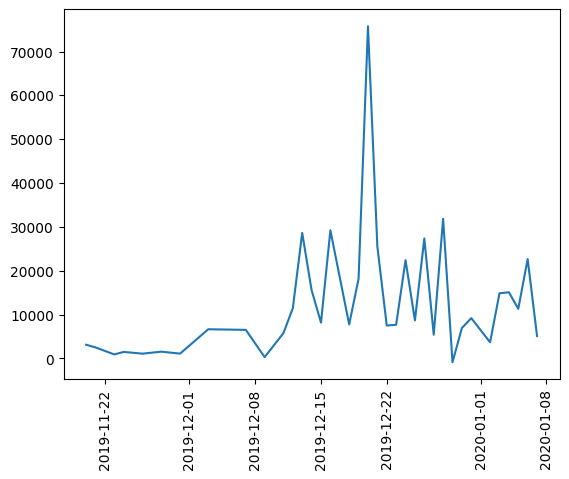

In [124]:
plt.plot(daily_sales_df['ymd'], daily_sales_df['sales'])
plt.xticks(rotation=90)

In [125]:
daily_sales_df.head()

,ymd,sales
0,2019-11-20,3128.0
1,2019-11-21,2516.0
2,2019-11-23,928.0
3,2019-11-24,1491.0
4,2019-11-26,1095.0


In [126]:
daily_sales_df.set_index('ymd').resample('W').sum()

,sales
ymd,
2019-11-24,8063.0
2019-12-01,3755.0
2019-12-08,13186.0
2019-12-15,69931.0
2019-12-22,163973.0
2019-12-29,102575.0
2020-01-05,61131.0
2020-01-12,27774.0


In [127]:
daily_sales_df.head(10)

,ymd,sales
0,2019-11-20,3128.0
1,2019-11-21,2516.0
2,2019-11-23,928.0
3,2019-11-24,1491.0
4,2019-11-26,1095.0
5,2019-11-28,1555.0
6,2019-11-30,1105.0
7,2019-12-03,6661.0
8,2019-12-07,6525.0
9,2019-12-09,302.0


In [132]:
# 2019-11-20から何日経過した差分を作成
daily_sales_df['ymd'] - daily_sales_df.iloc[0, 0]

0     0 days
1     1 days
2     3 days
3     4 days
4     6 days
5     8 days
6    10 days
7    13 days
8    17 days
9    19 days
10   21 days
11   22 days
12   23 days
13   24 days
14   25 days
15   26 days
16   28 days
17   29 days
18   30 days
19   31 days
20   32 days
21   33 days
22   34 days
23   35 days
24   36 days
25   37 days
26   38 days
27   39 days
28   40 days
29   41 days
30   43 days
31   44 days
32   45 days
33   46 days
34   47 days
35   48 days
Name: ymd, dtype: timedelta64[ns]